In [531]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [532]:
def remove_outliers(group):
    """
    Remove outliers from a group of data based on Tukey's method.

    Parameters:
        group (pandas.DataFrame): A DataFrame representing a group of data.

    Returns:
        pandas.DataFrame: A DataFrame with outliers removed based on Tukey's method.

    Tukey's method identifies outliers as values that fall below Q1 - 1.5 * IQR or
    above Q3 + 1.5 * IQR, where Q1 is the first quartile, Q3 is the third quartile,
    and IQR is the interquartile range. This function calculates these values for
    the 'time' column within the input group DataFrame and removes any data points
    that are considered outliers.

    Example:
    >>> group = pd.DataFrame({'instance_size': ['A', 'A', 'B', 'B'],
    ...                      'time': [10, 15, 20, 30]})
    >>> cleaned_group = remove_outliers(group)
    >>> print(cleaned_group)
      instance_size  time
    0             A    10
    1             A    15

    """
    q1 = group['time'].quantile(0.25)
    q3 = group['time'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group['time'] >= lower_bound) & (group['time'] <= upper_bound)]


In [533]:
df = pd.read_csv('results.csv')
df = df[df['algorithm'] != 'fptas']
df["instance_size"] = df["file"].str.extract(r"knapPI_\d+_(\d+)_\d+_\d+")
df.describe()

,time,max_value
count,4204.000000,4204.000000
mean,25.083857,71286.574215
std,208.360109,127564.397199
min,0.000000,1487.000000
25%,0.000302,7098.000000
50%,0.023949,18038.000000
75%,1.796752,72505.000000
max,10125.479636,563647.000000


In [534]:
df["instance_size"] = df["instance_size"].astype(int)

df = df.groupby('instance_size').apply(remove_outliers).reset_index(drop=True)
df.describe()

,time,max_value,instance_size
count,4193.000000,4193.000000,4193.000000
mean,18.319839,71073.027427,2670.736943
std,52.075335,127446.432183,3368.581663
min,0.000000,1487.000000,100.000000
25%,0.000302,7098.000000,200.000000
50%,0.005482,18038.000000,1000.000000
75%,1.795801,72505.000000,5000.000000
max,462.201318,563647.000000,10000.000000


In [567]:
for instance_size in df['instance_size'].unique():
    describe = df[(df['instance_size'] == instance_size) & (df['algorithm'] == 'dynamic')].describe()
    print(f"Count: {describe['time']['count']}")
    print(f"Instance size: {instance_size}")
    print(f"Mean: {describe['time']['mean']:.4f}")
    print(f"Standard deviation: {describe['time']['std']:.4f}\n")

Count: 169.0
Instance size: 4
Mean: 0.0000
Standard deviation: 0.0000

Count: 78.0
Instance size: 5
Mean: 0.0002
Standard deviation: 0.0000

Count: 84.0
Instance size: 7
Mean: 0.0002
Standard deviation: 0.0001

Count: 172.0
Instance size: 10
Mean: 0.0008
Standard deviation: 0.0006

Count: 172.0
Instance size: 20
Mean: 0.0087
Standard deviation: 0.0026

Count: 85.0
Instance size: 23
Mean: 0.0921
Standard deviation: 0.0104

Count: 85.0
Instance size: 24
Mean: 58.1005
Standard deviation: 4.9454



In [536]:
df[df['instance_size'] <= 1000]

,file,algorithm,time,max_value,instance_size
0,knapPI_1_100_1000_1,greedy,0.000046,8817.0,100
1,knapPI_1_100_1000_1,dynamic,0.025400,9147.0,100
2,knapPI_2_100_1000_1,greedy,0.000046,1487.0,100
3,knapPI_2_100_1000_1,dynamic,0.032397,1514.0,100
4,knapPI_3_100_1000_1,greedy,0.000047,2375.0,100
...,...,...,...,...,...
2399,knapPI_1_1000_1000_1,dynamic,1.791182,54503.0,1000
2400,knapPI_2_1000_1000_1,greedy,0.000293,9046.0,1000
2401,knapPI_2_1000_1000_1,dynamic,1.801369,9052.0,1000
2402,knapPI_3_1000_1000_1,greedy,0.000303,14374.0,1000


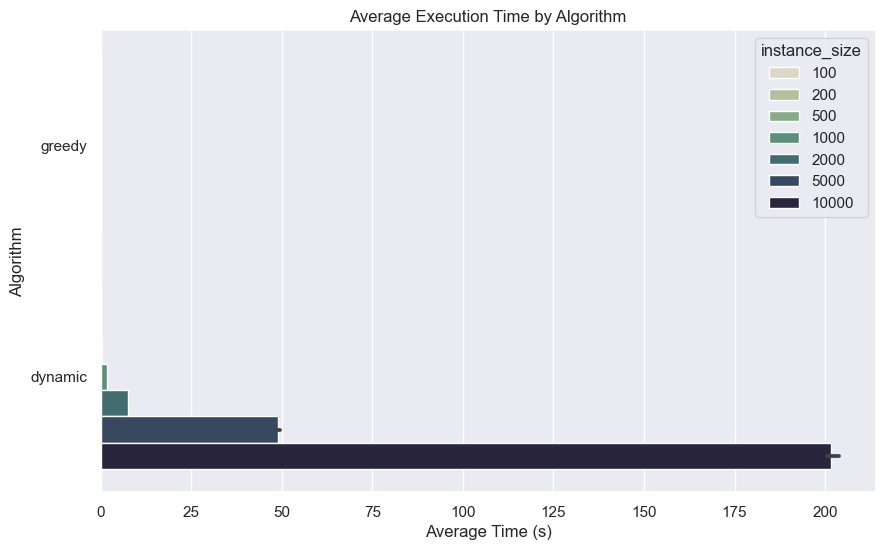

In [537]:
plt.figure(figsize=(10, 6))
sns.barplot(y='algorithm', x="time", data=df, hue=df["instance_size"], \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

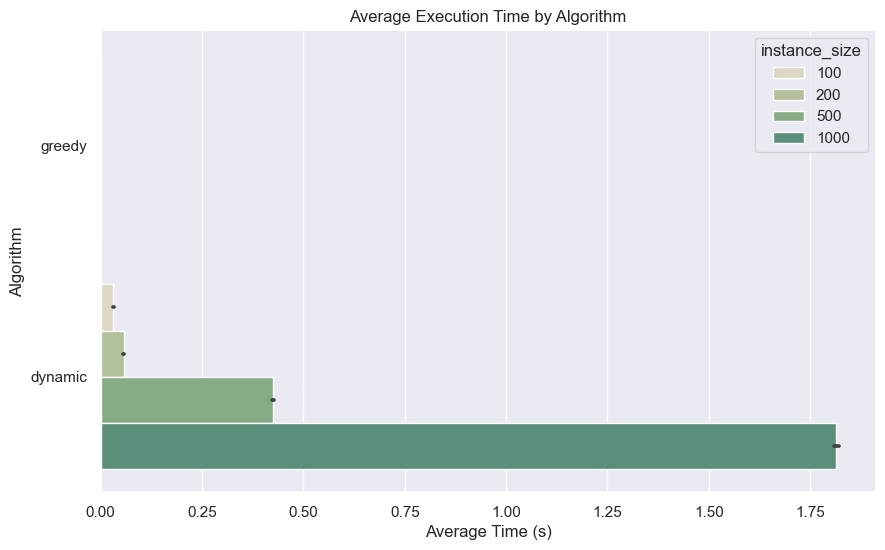

In [538]:
df_1000 = df[df['instance_size'] <= 1000]

plt.figure(figsize=(10, 6))
sns.barplot(y='algorithm', x="time", data=df_1000, hue=df_1000["instance_size"], \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

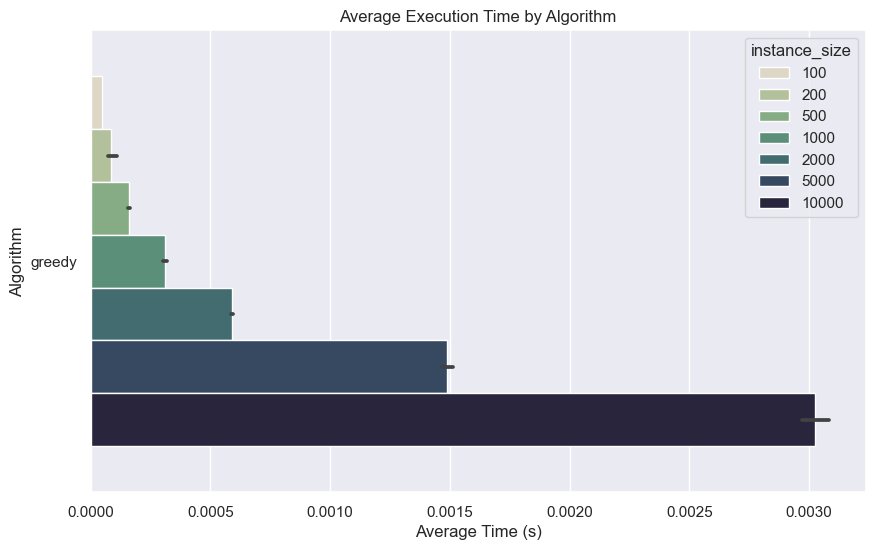

In [539]:
plt.figure(figsize=(10, 6))
filtered_df = df[(df['algorithm'] == 'greedy')]
sns.barplot(y='algorithm', x="time", data=filtered_df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

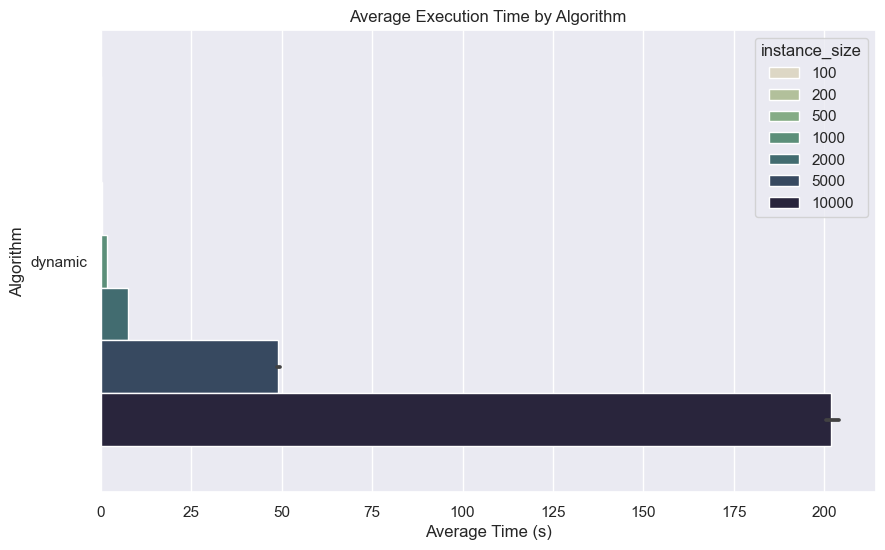

In [540]:
plt.figure(figsize=(10, 6))
filtered_df = df[(df['algorithm'] == 'dynamic')]
sns.barplot(y='algorithm', x="time", data=filtered_df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

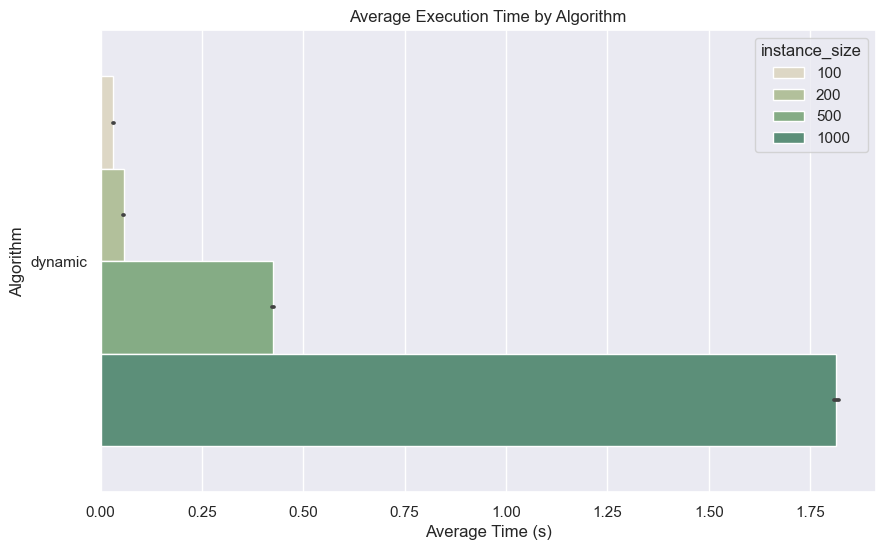

In [541]:
plt.figure(figsize=(10, 6))
filtered_df = df[(df['algorithm'] == 'dynamic') & (df['instance_size'] <= 1000)]
sns.barplot(y='algorithm', x="time", data=filtered_df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

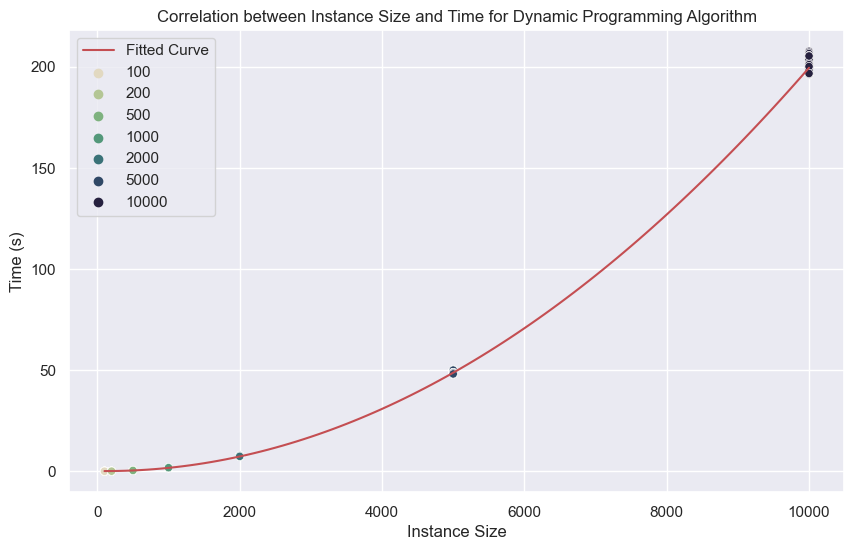

In [542]:
import numpy as np
from scipy.optimize import curve_fit

filtered_df = df[(df['algorithm'] == 'dynamic')]

filtered_df = filtered_df.groupby('instance_size').apply(remove_outliers).reset_index(drop=True)

def polynomial_func(x, a, b, c):
    return a * np.power(x, 2) + b * x + c

popt, _ = curve_fit(polynomial_func, filtered_df["instance_size"].astype(int), filtered_df["time"])

x_curve_dynamic = np.linspace(filtered_df["instance_size"].astype(int).min(), filtered_df["instance_size"].astype(int).max(), 100)

y_curve_dynamic = polynomial_func(x_curve_dynamic, *popt)

plt.figure(figsize=(10, 6))
plt.plot(x_curve_dynamic, y_curve_dynamic, 'r', label="Fitted Curve")

# Use Seaborn to create the scatter plot with hue
sns.scatterplot(data=filtered_df, x="instance_size", y="time", hue="instance_size", \
                palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))


plt.title("Correlation between Instance Size and Time for Dynamic Programming Algorithm")
plt.xlabel("Instance Size")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

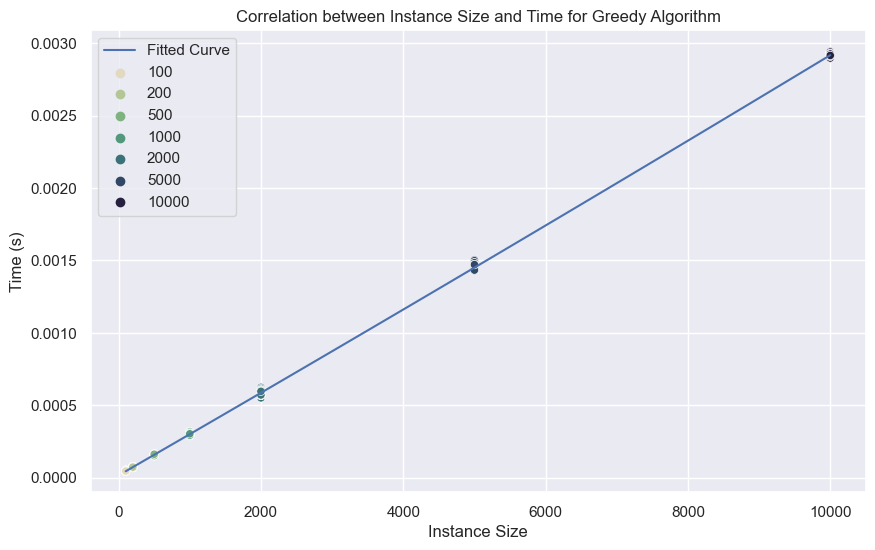

In [543]:
import numpy as np
from scipy.optimize import curve_fit

filtered_df = df[(df['algorithm'] == 'greedy')]

filtered_df = filtered_df.groupby('instance_size').apply(remove_outliers).reset_index(drop=True)

def polynomial_func(x, a, b, c):
    return a * np.power(x, 2) + b * x + c

popt, _ = curve_fit(polynomial_func, filtered_df["instance_size"].astype(int), filtered_df["time"])

x_curve_greedy = np.linspace(filtered_df["instance_size"].astype(int).min(), filtered_df["instance_size"].astype(int).max(), 100)

y_curve_greedy = polynomial_func(x_curve_greedy, *popt)

plt.figure(figsize=(10, 6))
plt.plot(x_curve_greedy, y_curve_greedy, 'b', label="Fitted Curve")

# Use Seaborn to create the scatter plot with hue
sns.scatterplot(data=filtered_df, x="instance_size", y="time", hue="instance_size", \
                palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))


plt.title("Correlation between Instance Size and Time for Greedy Algorithm")
plt.xlabel("Instance Size")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

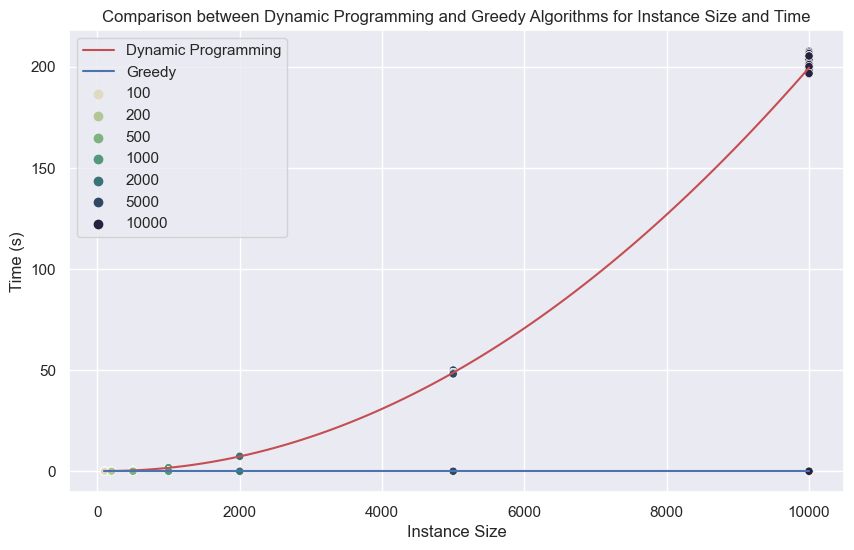

In [544]:
filtered_df_dynamic = df[(df['algorithm'] == 'dynamic')]
filtered_df_greedy = df[(df['algorithm'] == 'greedy')]
filtered_df_dynamic = filtered_df_dynamic.groupby('instance_size').apply(remove_outliers).reset_index(drop=True)
filtered_df_greedy = filtered_df_greedy.groupby('instance_size').apply(remove_outliers).reset_index(drop=True)




plt.figure(figsize=(10, 6))
plt.plot(x_curve_dynamic, y_curve_dynamic, 'r', label="Dynamic Programming")
plt.plot(x_curve_greedy, y_curve_greedy, 'b', label="Greedy")

sns.scatterplot(data=filtered_df_dynamic, x="instance_size", y="time", hue="instance_size", \
                palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))

sns.scatterplot(data=filtered_df_greedy, x="instance_size", y="time", hue="instance_size", \
                palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7), legend=False)

plt.title("Comparison between Dynamic Programming and Greedy Algorithms for Instance Size and Time")
plt.xlabel("Instance Size")
plt.ylabel("Time (s)")
plt.legend()
plt.show()


In [545]:
df = pd.read_csv('results_low.csv')
df["instance_size"] = df["file"].str.extract(r"kp_(\d+)_\d+")
df.describe()

,time,value
count,2562.000000,2.562000e+03
mean,6.345994,1.345385e+06
std,18.816512,4.043386e+06
min,0.000023,1.600000e+01
25%,0.000041,5.200000e+01
50%,0.000151,2.940000e+02
75%,0.007264,1.025000e+03
max,103.914104,1.354909e+07


In [546]:
df["instance_size"] = df["instance_size"].astype(int)

df = df.groupby('instance_size').apply(remove_outliers).reset_index(drop=True)
df.describe()

,time,value,instance_size
count,2546.000000,2.546000e+03,2546.000000
mean,6.385842,1.353839e+06,12.747447
std,18.868829,4.054664e+06,7.734052
min,0.000023,1.600000e+01,4.000000
25%,0.000041,5.200000e+01,5.000000
50%,0.000149,2.940000e+02,10.000000
75%,0.007183,1.025000e+03,20.000000
max,103.914104,1.354909e+07,24.000000


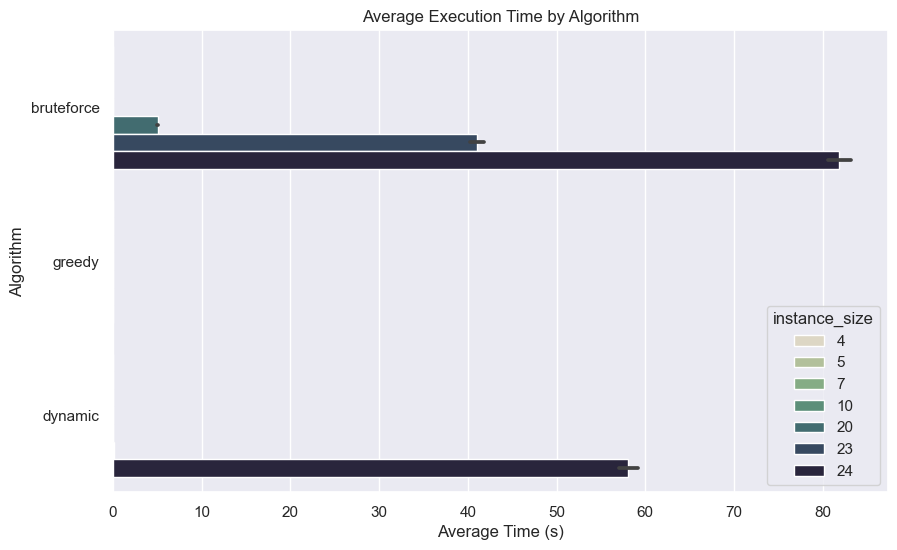

In [547]:
plt.figure(figsize=(10, 6))
sns.barplot(y='algorithm', x="time", data=df, hue=df["instance_size"], \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

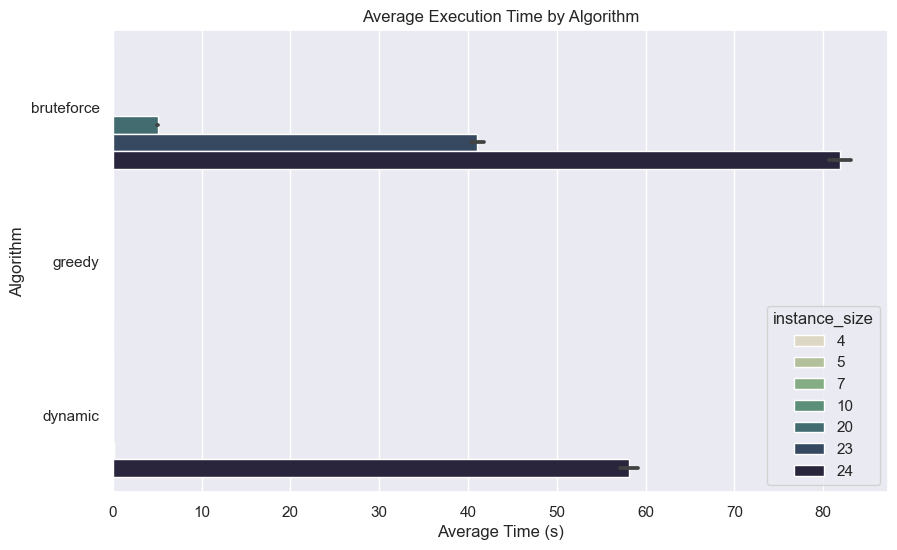

In [548]:
df_1000 = df[df['instance_size'] <= 1000]

plt.figure(figsize=(10, 6))
sns.barplot(y='algorithm', x="time", data=df_1000, hue=df_1000["instance_size"], \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

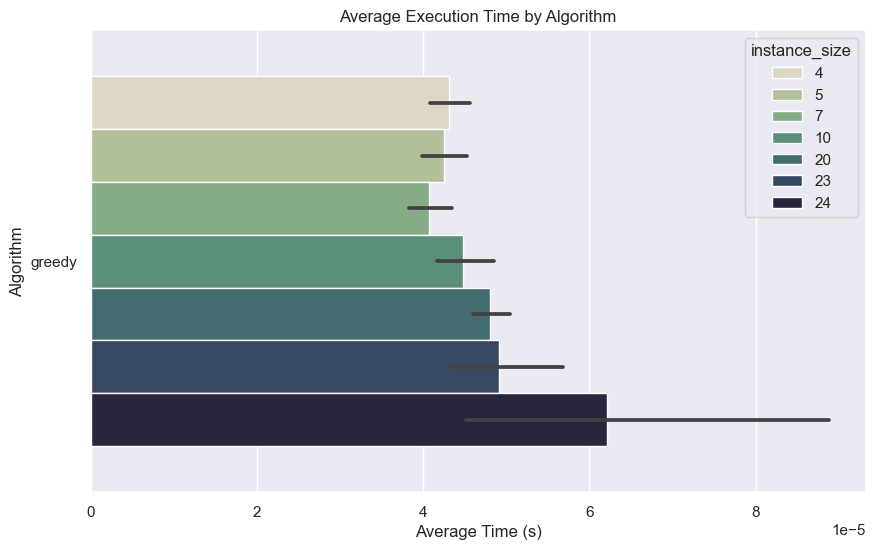

In [549]:
plt.figure(figsize=(10, 6))
filtered_df = df[(df['algorithm'] == 'greedy')]
sns.barplot(y='algorithm', x="time", data=filtered_df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

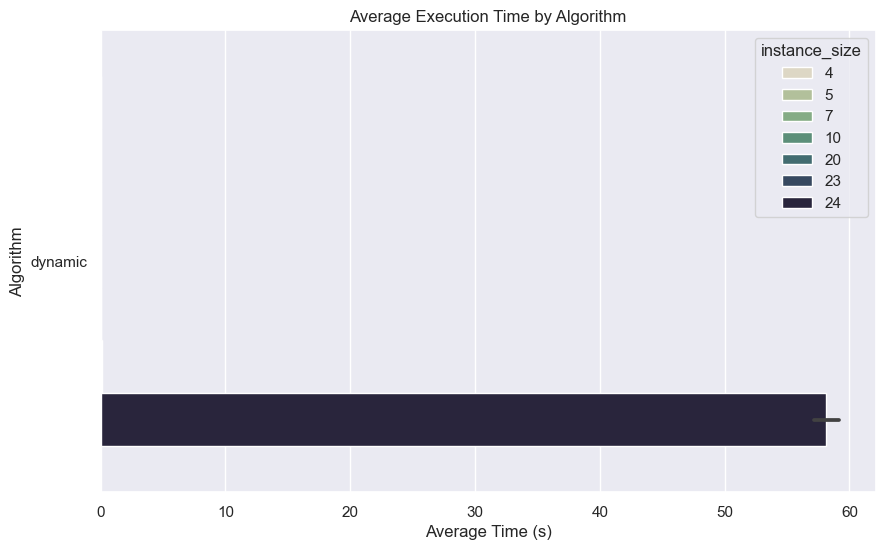

In [550]:
plt.figure(figsize=(10, 6))
filtered_df = df[(df['algorithm'] == 'dynamic')]
sns.barplot(y='algorithm', x="time", data=filtered_df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

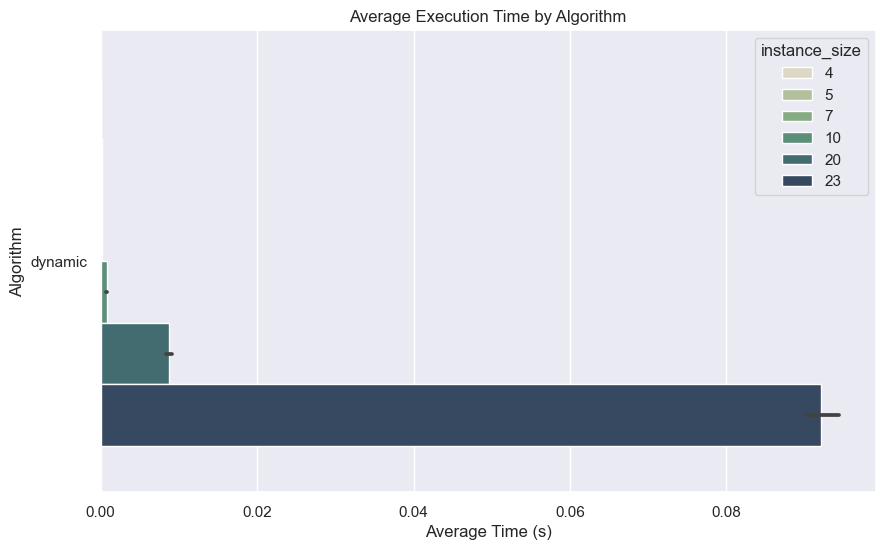

In [551]:
plt.figure(figsize=(10, 6))
filtered_df = df[(df['algorithm'] == 'dynamic') & (df['instance_size'] <= 23)]
sns.barplot(y='algorithm', x="time", data=filtered_df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

In [552]:
import numpy as np
from scipy.optimize import curve_fit

def polynomial_func(x, a, b, c):
    return a * np.power(x, 2) + b * x + c

def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

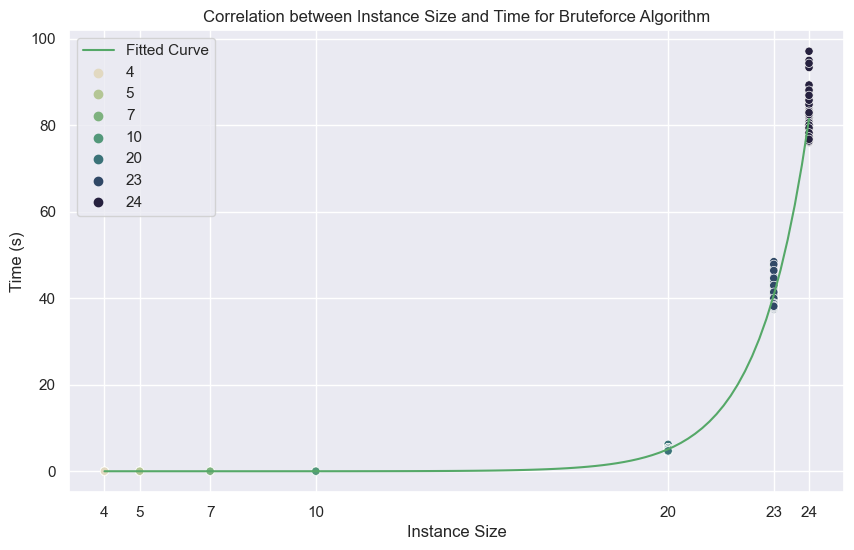

In [566]:

filtered_df_bruteforce = df[(df['algorithm'] == 'bruteforce')]

filtered_df_bruteforce = filtered_df_bruteforce.groupby('instance_size').apply(remove_outliers).reset_index(drop=True)

popt, _ = curve_fit(exponential_func, filtered_df_bruteforce["instance_size"].astype(int), filtered_df_bruteforce["time"])

x_curve_bruteforce = np.linspace(filtered_df_bruteforce["instance_size"].astype(int).min(), filtered_df_bruteforce["instance_size"].astype(int).max(), 100)

y_curve_bruteforce = exponential_func(x_curve_bruteforce, *popt)

plt.figure(figsize=(10, 6))
plt.plot(x_curve_bruteforce, y_curve_bruteforce, 'g', label="Fitted Curve")

# Use Seaborn to create the scatter plot with hue
sns.scatterplot(data=filtered_df_bruteforce, x="instance_size", y="time", hue="instance_size", \
                palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))


plt.title("Correlation between Instance Size and Time for Bruteforce Algorithm")
plt.xticks(filtered_df_bruteforce["instance_size"].astype(int).unique())
plt.xlabel("Instance Size")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

In [554]:
filtered_df_dynamic = filtered_df_dynamic.groupby('instance_size').apply(remove_outliers).reset_index(drop=True)


/var/folders/t8/zdrd9l7d6sn0d3v91qpznmp00000gn/T/ipykernel_98651/3368942095.py:17: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.scatterplot(data=filtered_df_dynamic, x="instance_size", y="time", hue="instance_size", \


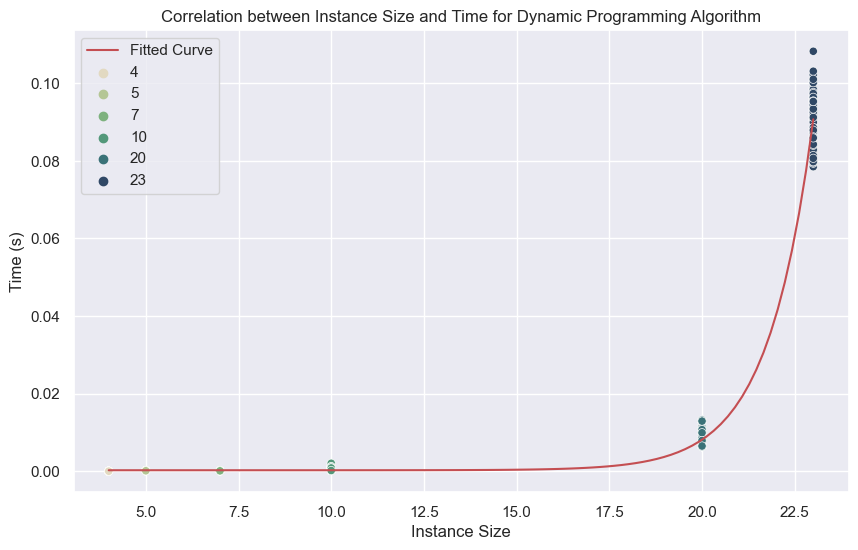

In [555]:
filtered_df_dynamic = df[(df['algorithm'] == 'dynamic') & (df['instance_size'] <= 23)]

filtered_df_dynamic = filtered_df_dynamic.groupby('instance_size').apply(remove_outliers).reset_index(drop=True)



popt, _ = curve_fit(exponential_func, filtered_df_dynamic["instance_size"].astype(int), filtered_df_dynamic["time"])

x_curve_dynamic = np.linspace(filtered_df_dynamic["instance_size"].astype(int).min(), filtered_df_dynamic["instance_size"].astype(int).max(), 100)

y_curve_dynamic = exponential_func(x_curve_dynamic, *popt)

plt.figure(figsize=(10, 6))
plt.plot(x_curve_dynamic, y_curve_dynamic, 'r', label="Fitted Curve")

# Use Seaborn to create the scatter plot with hue
sns.scatterplot(data=filtered_df_dynamic, x="instance_size", y="time", hue="instance_size", \
                palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))


plt.title("Correlation between Instance Size and Time for Dynamic Programming Algorithm")
plt.xlabel("Instance Size")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

/var/folders/t8/zdrd9l7d6sn0d3v91qpznmp00000gn/T/ipykernel_98651/2614004126.py:15: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.scatterplot(data=filtered_df_greedy, x="instance_size", y="time", hue="instance_size", \


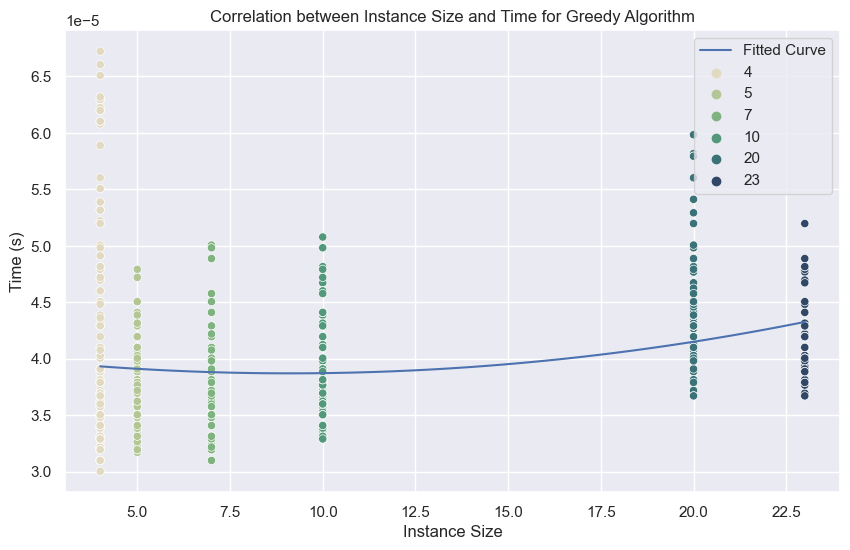

In [556]:
filtered_df_greedy = df[(df['algorithm'] == 'greedy') & (df['instance_size'] <= 23)]

filtered_df_greedy = filtered_df_greedy.groupby('instance_size').apply(remove_outliers).reset_index(drop=True)

popt, _ = curve_fit(polynomial_func, filtered_df_greedy["instance_size"].astype(int), filtered_df_greedy["time"])

x_curve_greedy = np.linspace(filtered_df_greedy["instance_size"].astype(int).min(), filtered_df_greedy["instance_size"].astype(int).max(), 100)

y_curve_greedy = polynomial_func(x_curve_greedy, *popt)

plt.figure(figsize=(10, 6))
plt.plot(x_curve_greedy, y_curve_greedy, 'b', label="Fitted Curve")

# Use Seaborn to create the scatter plot with hue
sns.scatterplot(data=filtered_df_greedy, x="instance_size", y="time", hue="instance_size", \
                palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))


plt.title("Correlation between Instance Size and Time for Greedy Algorithm")
plt.xlabel("Instance Size")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

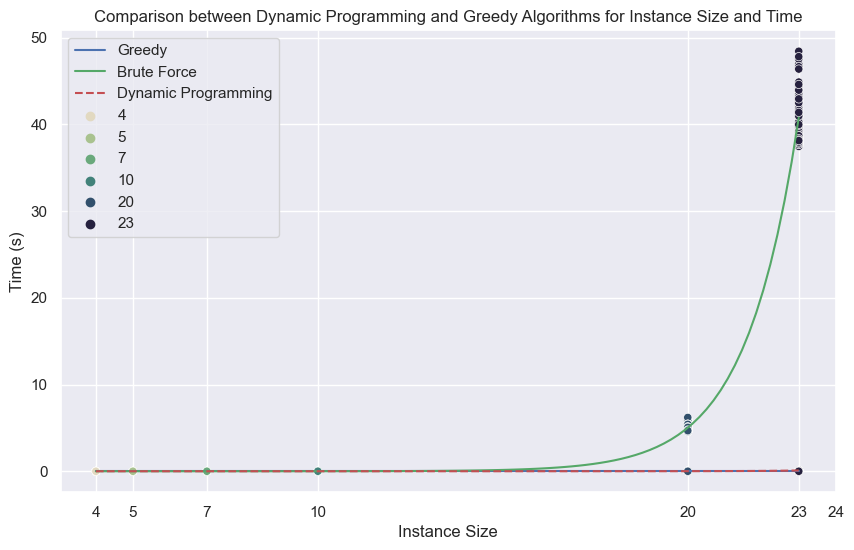

In [563]:
plt.figure(figsize=(10, 6))
plt.plot(x_curve_greedy, y_curve_greedy, 'b', label="Greedy")
plt.plot(x_curve_bruteforce, y_curve_bruteforce, 'g', label="Brute Force")
plt.plot(x_curve_dynamic, y_curve_dynamic, 'r', label="Dynamic Programming", linestyle='dashed')


sns.scatterplot(data=filtered_df_dynamic, x="instance_size", y="time", hue="instance_size", \
                legend=False)

sns.scatterplot(data=filtered_df_greedy, x="instance_size", y="time", hue="instance_size", \
                palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=6))

sns.scatterplot(data=filtered_df_bruteforce, x="instance_size", y="time", hue="instance_size", \
                palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=6), legend=False)

plt.title("Comparison between Dynamic Programming and Greedy Algorithms for Instance Size and Time")
plt.xticks(df["instance_size"].unique())
plt.xlabel("Instance Size")
plt.ylabel("Time (s)")
plt.legend()
plt.show()
